In [270]:
# Importing required packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import re
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from statistics import mode
from nltk.tokenize import word_tokenize

In [271]:
google_app = pd.read_csv("C:/Users/Anjali Shalimar/Documents/Python Project/googleplaystore.csv")
google_rev = pd.read_csv("C:/Users/Anjali Shalimar/Documents/Python Project/googleplaystore_user_reviews.csv")


In [272]:
google_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [273]:
google_rev.shape

(64295, 5)

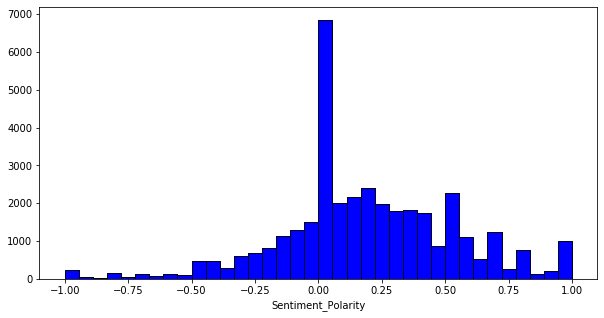

In [274]:
#######################################
## Data Preprocessing - Reviews Data ##
#######################################

# reviews turning to lower case and removing trailing spaces
google_rev['Translated_Review'] = google_rev['Translated_Review'].str.lower()
google_rev['Translated_Review'] = google_rev['Translated_Review'].str.strip()

# count distribution
google_rev['Sentiment'].value_counts()
## 64% of non-na sentiment - Positive
## 22.1% Negative
## 13.8% Neutral

# Removing observations with all NA values 
google_rev.isna().sum()
google_rev = google_rev.dropna()
google_rev.isna().sum()

# Checking for duplicate rows in the raw data
google_rev.duplicated().sum()


# Density Plot for Sentiment Polarity

# matplotlib histogram
plt.hist(google_rev['Sentiment_Polarity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(google_rev['Sentiment_Polarity'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}) ;

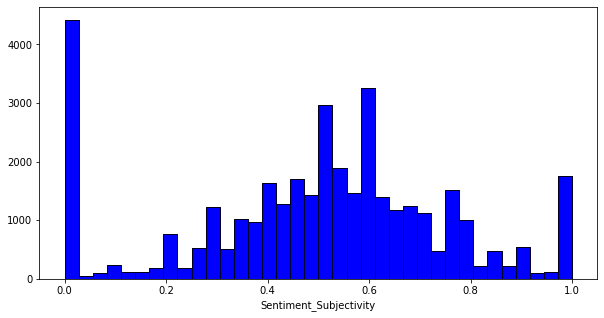

In [275]:
# Density Plot for Sentiment Subjectivity
# matplotlib histogram
plt.hist(google_rev['Sentiment_Subjectivity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(google_rev['Sentiment_Subjectivity'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}) ;



In [276]:
## Mean , Median , Min , Max and standard deviation of Subjectivity and Polarity (by Sentiment Type)
dat = google_rev.groupby('Sentiment',as_index=False).agg({'Sentiment_Polarity':['mean','median','min','max','std'],
                                                          'Sentiment_Subjectivity':['mean','median','min','max','std'],})
dat.head()

Sentiment Sentiment_Polarity                                        \
                          mean    median           min           max   
0  Negative          -0.256173 -0.183333 -1.000000e+00 -2.523234e-18   
1   Neutral           0.000000  0.000000  0.000000e+00  0.000000e+00   
2  Positive           0.372402  0.330000  5.551115e-18  1.000000e+00   

            Sentiment_Subjectivity                                
        std                   mean    median  min  max       std  
0  0.235483               0.535087  0.518095  0.0  1.0  0.215474  
1  0.000000               0.079786  0.000000  0.0  1.0  0.204535  
2  0.252656               0.566949  0.564286  0.0  1.0  0.193858

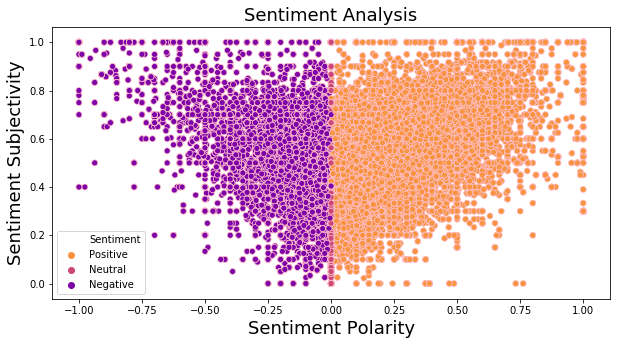

In [277]:
# Scatter PLot of Subjectivity and Polarity
j = sns.scatterplot(google_rev['Sentiment_Polarity'],google_rev['Sentiment_Subjectivity'],hue=google_rev['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=18)
plt.ylabel('Sentiment Subjectivity', fontsize=18)
plt.title("Sentiment Analysis", fontsize=18)
plt.show()

In [278]:
# Processing variables 'App' and 'Sentiment'
google_rev.dtypes
google_rev['App'] = google_rev['App'].str.lower()
google_rev['App'] = google_rev['App'].str.strip()
google_rev['Sentiment'] = google_rev['Sentiment'].str.lower()
google_rev['Sentiment'] = google_rev['Sentiment'].str.strip()
google_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 best foods for you,i like eat delicious food. that's i'm cooking ...,positive,1.00,0.533333
1,10 best foods for you,this help eating healthy exercise regular basis,positive,0.25,0.288462
3,10 best foods for you,works great especially going grocery store,positive,0.40,0.875000
4,10 best foods for you,best idea us,positive,1.00,0.300000
5,10 best foods for you,best way,positive,1.00,0.300000


In [279]:
######################################
###  Text Analysis - Review Data   ###
######################################
## Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

a=google_rev.groupby(['App','Sentiment'])['Translated_Review'].apply(lambda x: ','.join(x)).reset_index()


## Removing punctuations from Reviews
a['Translated_Review'] = a['Translated_Review'].apply(lambda x :re.sub(r'[^(a-zA-Z)\s]','', x ) )

## Removing stopwords
def rem_stp(input_series):
    words = word_tokenize(input_series)
    a = [w for w in words if not w in stopwords] 
    return(a)
a['Translated_Review'] = a['Translated_Review'].apply(rem_stp) 
a = a.dropna()
a = a.reset_index()

## Getting Top 5 frequent words per review 
l = a.shape[0]
word_cloud = []
for index, row in a.iterrows():
    words = nltk.FreqDist(row['Translated_Review'])
    word_features = list(words.keys())[:5]
    word_cloud.append(word_features)
dat = pd.DataFrame(word_cloud)

google_rev_words = pd.concat([a, dat], axis=1)



[nltk_data] Downloading package stopwords to C:\Users\Anjali
[nltk_data]     Shalimar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [280]:
#######################################
####   Data Cleaning - Apps Data   ####
#######################################

google_app.head()

## App Variable 
google_app['App'] = google_rev['App'].str.lower()
google_app['App'] = google_rev['App'].str.strip()
## Converting App Size into Numeric variable using lambda function
# All v#alues in Megabytes

google_app['Size'] = google_app['Size'].apply(lambda x : x.strip('+').replace(',', ''))

ind_1 = google_app['Size'].loc[google_app['Size'].str.contains('k')].index.tolist()
size_new_k = pd.DataFrame(google_app.loc[ind_1, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1000).apply(lambda x: round(x, 3)).astype(str))
google_app.loc[ind_1,'Size'] = size_new_k

google_app['Size'] = google_app['Size'].apply(lambda x : x.strip('M'))

google_app[google_app['Size'] == 'Varies with device']= 0

google_app['Size'] = google_app['Size'].astype(float)

In [281]:
## Converting 'Installs' to numeric variable by taking minimum value of number of installs
google_app[google_app['Installs']=='Free']=0
google_app['Installs'] = google_app['Installs'].astype(str).apply(lambda x: x.strip('+').replace(',',''))


In [282]:
## Price Variable
set(google_app['Price']) ## There are '$' before price columns
google_app['Price'] = google_app['Price'].astype(str).apply(lambda x: x.strip('$')).astype(float)



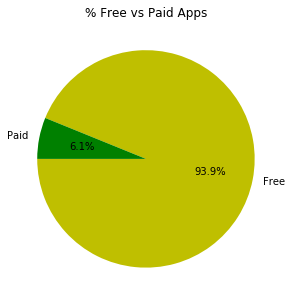

,Type,Rating
,,count
0,Free,8846
1,Paid,579


In [283]:
## Type Variable -- converting 0 to category 'Free'
set(google_app['Type'])
google_app[google_app['Type']==0] = 'Free'
set(google_app['Type'])
#google_app.groupby('Type',as_index=False).agg({'Rating':['count']})
size=[8846,579]
sentiment = ['Free', 'Paid']
colors = ['y', 'g']
plt.pie(size, labels=sentiment, colors=colors, startangle=180, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()
google_app.groupby('Type',as_index=False).agg({'Rating':['count']})

In [284]:
# Category Variable
ind = google_app[google_app['Category'] == '1.9'].index
google_app = google_app.drop(ind)

In [285]:
#google_app['Reviews'] = google_app['Reviews'].astype(str)
#ind_2 = google_app['Reviews'].loc[google_app['Reviews'].str.contains('M')]
#rev_n = pd.DataFrame(google_app.loc[ind_2, 'Reviews'].apply(lambda x: x.strip('M')).astype(float).apply(lambda x: x * 1000000).apply(lambda x: round(x, 0)).astype(str))
google_app[google_app['Reviews']=='Free'] = 0
google_app['Reviews'] = google_app['Reviews'].astype(float)

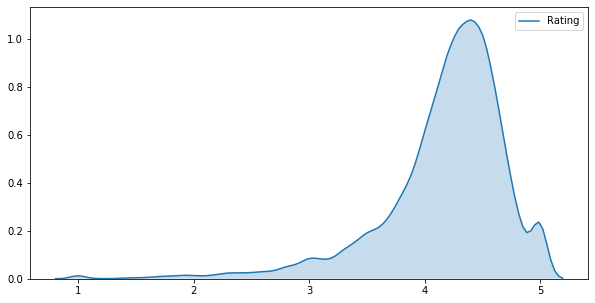

In [255]:
###################################
#####     EDA - Apps Data     #####
###################################
# density plot for App Rating 
rating = google_app[google_app['Rating'] != 0 ]
sns.kdeplot(shade=True,data=rating['Rating']);

from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)



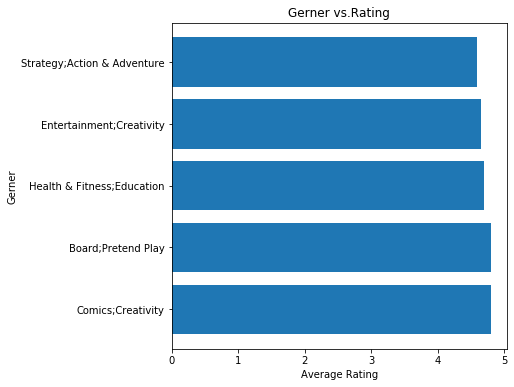

In [256]:
## Average Rating By Genre 
fig = plt.figure(figsize=(6,6))
google_app['Rating'] = google_app['Rating'].astype(float)
dat = google_app.groupby('Genres',as_index=False).agg({'Rating':['mean']})
dat.columns = dat.columns.droplevel(1)
dat= dat.sort_values(by=['Rating'],ascending=False)
dat = dat [0:5]
dat
objects = dat['Genres'].tolist()
y =np.arange(len(objects))
x = dat['Rating'].tolist()
plt.barh(y,x)
plt.yticks(y, objects)
plt.xlabel('Average Rating')
plt.title('Gerner vs.Rating')
plt.ylabel('Gerner')
plt.show()

Text(0.5, 1.0, 'Content Rating VS Rating')

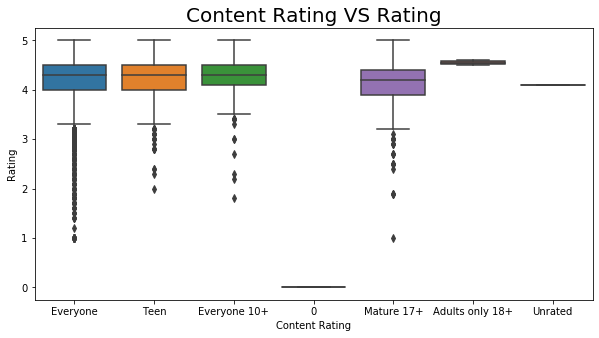

In [257]:
# Content Rating vs App Rating 
plt.rcParams['figure.figsize'] = (10, 5)
google_app['Rating'] = google_app['Rating'].astype(float)
sns.boxplot(x = 'Content Rating', y = 'Rating', data =google_app )
plt.title("Content Rating VS Rating", size = 20)

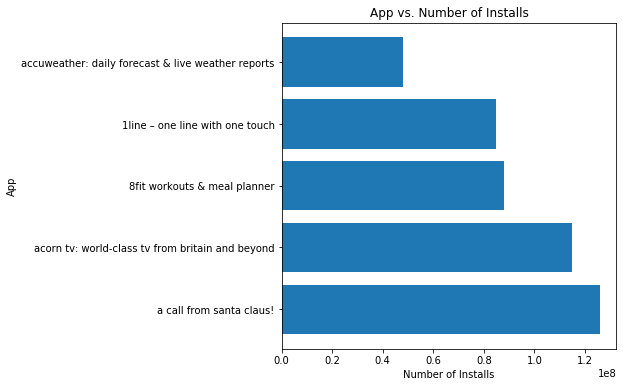

In [258]:
## Top 5 Apps in terms of Installs
fig = plt.figure(figsize=(6,6))
google_app['Installs'] = google_app['Installs'].astype(float)
dat = google_app.groupby('App',as_index=False).agg({'Installs':['mean']})
dat.columns = dat.columns.droplevel(1)
dat['Installs'] = dat['Installs'].astype(float)
dat= dat.sort_values(by=['Installs'],ascending=False)
dat = dat [0:5]
dat
objects = dat['App'].tolist()
y =np.arange(len(objects))
x = dat['Installs'].tolist()
plt.barh(y,x)
plt.yticks(y, objects)
plt.xlabel('Number of Installs')
plt.title('App vs. Number of Installs')
plt.ylabel('App')
plt.show()


In [259]:
## Getting average review score, subjectivity and polarity by App

# Labeling Positive = 1 , Neutral = 0 and , Negative = -1

ind_p = google_rev['Sentiment'].loc[google_rev['Sentiment']=='positive'].index
ind_ne = google_rev['Sentiment'].loc[google_rev['Sentiment']=='neutral'].index
ind_n = google_rev['Sentiment'].loc[google_rev['Sentiment']=='negative'].index
google_rev.loc[ind_p,'Sentiment_int'] = 1
google_rev.loc[ind_ne,'Sentiment_int'] = 0
google_rev.loc[ind_n,'Sentiment_int'] = -1

In [260]:
## Grouping Positive , Negative and Neutral sentiment counts , subjectivity scores and polarity scores for each App
sentiment_dat = google_rev.groupby(['App','Sentiment'],as_index=False).agg({'Sentiment_int':['count'],
                                                   'Sentiment_Polarity':['mean'],
                                                   'Sentiment_Subjectivity':['mean']})
sentiment_dat.columns = sentiment_dat.columns.droplevel(1)
sentiment_dat = sentiment_dat.rename(columns = {'Sentiment_int':'count',
                                                               'Sentiment_Polarity':'mean_polarity',
                                                               'Sentiment_Subjectivity':'mean_subjectivity'})

## Reshaping Data
sentiment_dat = sentiment_dat.pivot(index='App',columns='Sentiment',values=['count','mean_polarity',
                                                                             'mean_subjectivity'])
# Using Join
sentiment_dat.columns = [' '.join(col).strip() for col in sentiment_dat.columns.values]

In [261]:
# Merging sentiment_dat with app_data
final_data = google_app.join(sentiment_dat,on='App',how='left')
final_data.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,count negative,count neutral,count positive,mean_polarity negative,mean_polarity neutral,mean_polarity positive,mean_subjectivity negative,mean_subjectivity neutral,mean_subjectivity positive
0,10 best foods for you,ART_AND_DESIGN,4.1,159.0,19,10000.0,Free,0,Everyone,Art & Design,...,4.0.3 and up,10.0,22.0,162.0,-0.405,0.0,0.588717,0.355,0.0,0.571409
1,10 best foods for you,ART_AND_DESIGN,3.9,967.0,14,500000.0,Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,10.0,22.0,162.0,-0.405,0.0,0.588717,0.355,0.0,0.571409
2,NaN,ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,...,4.0.3 and up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 best foods for you,ART_AND_DESIGN,4.5,215644.0,25,50000000.0,Free,0,Teen,Art & Design,...,4.2 and up,10.0,22.0,162.0,-0.405,0.0,0.588717,0.355,0.0,0.571409
4,10 best foods for you,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,10.0,22.0,162.0,-0.405,0.0,0.588717,0.355,0.0,0.571409


In [262]:
# Random Forest Regressor to Predict App Ratings

# Category Encoding
google_app['Category'] = google_app['Category'].astype(str)
cat_list = google_app['Category'].unique().tolist() 
cat_list = ['cat_' + x for x in cat_list]
google_app = pd.concat([google_app, pd.get_dummies(google_app['Category'], prefix='cat')], axis=1)

# Type Encoding 
google_app['Type']=pd.get_dummies(google_app['Type'])

final_data = google_app.join(sentiment_dat,on='App',how='inner')


In [263]:
# Target and Predictor Variables
feature_cols = ['Reviews',
                'Size',
                'Installs',
                'Type',
                'Price',
                'cat_0',
 'cat_ART_AND_DESIGN',
 'cat_AUTO_AND_VEHICLES',
 'cat_BEAUTY',
 'cat_BOOKS_AND_REFERENCE',
 'cat_BUSINESS',
 'cat_COMICS',
 'cat_COMMUNICATION',
 'cat_DATING',
 'cat_EDUCATION',
 'cat_ENTERTAINMENT',
 'cat_EVENTS',
 'cat_FAMILY',
 'cat_FINANCE',
 'cat_FOOD_AND_DRINK',
 'cat_GAME',
 'cat_HEALTH_AND_FITNESS',
 'cat_HOUSE_AND_HOME',
 'cat_LIBRARIES_AND_DEMO',
 'cat_LIFESTYLE',
 'cat_MAPS_AND_NAVIGATION',
 'cat_MEDICAL',
 'cat_NEWS_AND_MAGAZINES',
 'cat_PARENTING',
 'cat_PERSONALIZATION',
 'cat_PHOTOGRAPHY',
 'cat_PRODUCTIVITY',
 'cat_SHOPPING',
 'cat_SOCIAL',
 'cat_SPORTS',
 'cat_TOOLS',
 'cat_TRAVEL_AND_LOCAL',
 'cat_VIDEO_PLAYERS',
 'cat_WEATHER',
 'mean_polarity negative', 'mean_polarity neutral',
 'mean_polarity positive', 'mean_subjectivity negative',
       'mean_subjectivity neutral', 'mean_subjectivity positive']
target_cols = ['Rating']
google_app = google_app.dropna()
final_data = final_data.dropna()
X= final_data[feature_cols]
Y= final_data[target_cols]


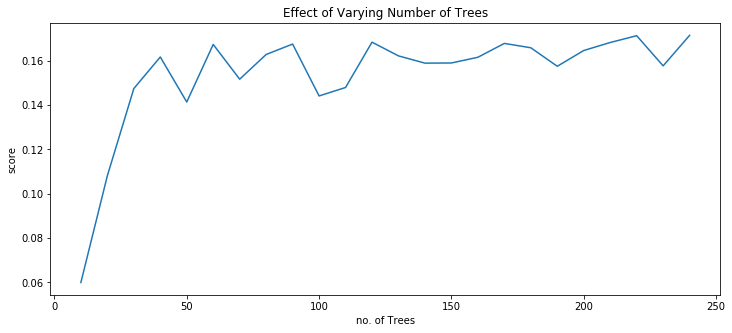

In [267]:
# Train Test Split
Xtrain , Xtest, Ytrain , Ytest =train_test_split(X,Y,random_state=12)
# Fitting the model
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
model
# Changing number of trees in RF
trees = np.arange(10, 250, 10)
model_scores = []
for i in trees:
    model.set_params(n_estimators=i)
    model.fit(Xtrain, Ytrain)
    model_scores.append(model.score(Xtest, Ytest))
plt.figure(figsize=(12, 5))
plt.title("Effect of Varying Number of Trees")
plt.xlabel("no. of Trees")
plt.ylabel("score")
plt.plot(trees, model_scores)
plt.show()

In [268]:
# Choosing 160 trees to get the best performance
model = RandomForestRegressor()
model.set_params(n_estimators=160)
model.fit(Xtrain,Ytrain)
## Prediction on Test Data
y_pred =  model.predict(Xtest)
mse = mean_squared_error(Ytest, y_pred)
rmse = np.sqrt(mse)
rmse


0.4916166572749561

In [269]:
#Performance of Train Dataset
y_pred =  model.predict(Xtrain)
mse = mean_squared_error(Ytrain, y_pred)
rmse = np.sqrt(mse)
rmse


0.19405966842230826